In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

pre_trained_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

for layer in pre_trained_model.layers:
    layer.trainable = False

X = pre_trained_model.output

X = layers.GlobalMaxPooling2D()(X)

X = layers.Dense(1024, activation='relu')(X)
X = layers.Dropout(0.2)(X)
X = layers.Dense(1, activation='sigmoid')(X)

model = Model(pre_trained_model.input, X)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 75, 75, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 75, 75, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 75, 75, 32)           0         ['bn_Conv1[0][0]']        

In [5]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer =RMSprop(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [10]:
import os
base_dir = 'D:\\MobileApp'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'test')

In [11]:
train_shah_dir = os.path.join(train_dir, 'Shahzaib')
train_affi_dir = os.path.join(train_dir, 'Affo')

valid_shah_dir = os.path.join(valid_dir, 'Shahzaib')
valid_affi_dir = os.path.join(valid_dir, 'Affo')

In [12]:
#Get file names 
train_shah_names = os.listdir(train_shah_dir)
print(train_shah_names[:10])

['IMG_20220306_154616_389.jpg', 'IMG_20220306_154814_952.jpg', 'IMG_20220306_154814_953.jpg', 'IMG_20220306_154814_954.jpg', 'IMG_20220306_160632_317.jpg', 'IMG_20220306_160721_460.jpg', 'IMG_20220306_160757_966.jpg', 'IMG_20220306_160909_850.jpg', 'IMG_20220306_160931_622.jpg', 'IMG_20220306_160936_902.jpg']


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=40.0,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [14]:
train_gen = train_datagen.flow_from_directory(train_dir,
                                              batch_size =15,
                                              class_mode = 'binary',
                                              target_size=(150,150))
test_gen = train_datagen.flow_from_directory(valid_dir,
                                             batch_size=2,
                                             class_mode='binary',
                                             target_size=(150,150))

Found 79 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [18]:
hist = model.fit(train_gen,steps_per_epoch=3,epochs=10,
                 validation_data = test_gen,validation_steps = 2)

Epoch 1/10
3/3 [==============================] - 10s 4s/step - loss: 0.0817 - accuracy: 0.9778 - val_loss: 0.1668 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 10s 4s/step - loss: 1.6787 - accuracy: 0.7333 - val_loss: 3.7103e-05 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 11s 3s/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 10s 3s/step - loss: 0.1137 - accuracy: 0.9706 - val_loss: 4.8827e-04 - val_accuracy: 1.0000
Epoch 5/10


KeyboardInterrupt: 

In [16]:
# Saving the deep learning model
from tensorflow.keras.models import save_model

save_model(model, 'D:\\MobileApp\\model.h5')

C:\Users\Mysterious Soul\AppData\Local\Temp\ipykernel_13488\3167419367.py:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'D:\\MobileApp\\model.h5')


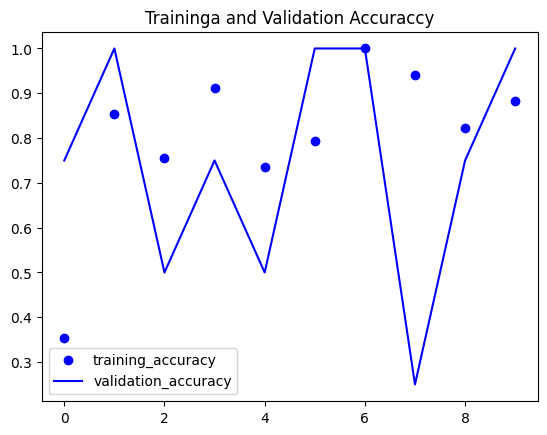

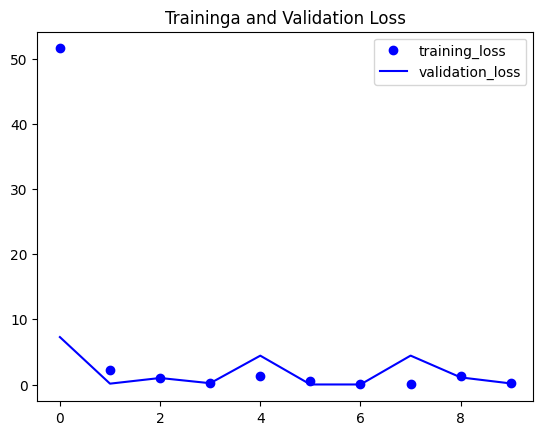

In [17]:
import matplotlib.pyplot as plt

def plot_loss_acc(hist):
  acc = hist.history['accuracy']
  loss = hist.history['loss']
  v_acc = hist.history['val_accuracy']
  v_loss = hist.history['val_loss']

  epochs = range(len(acc))

  plt.title("Traininga and Validation Accuraccy")
  plt.plot(epochs,acc,'bo',label = 'training_accuracy')
  plt.plot(epochs,v_acc,'b',label = 'validation_accuracy')

  plt.legend()
  plt.figure()
  plt.title("Traininga and Validation Loss")
  plt.plot(epochs,loss,'bo',label = 'training_loss')
  plt.plot(epochs,v_loss,'b',label = 'validation_loss')
  plt.legend()
  plt.figure
  plt.show()

plot_loss_acc(hist)

In [1]:
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the model
model = load_model("model.h5")
# Function to preprocess the image and make predictions
def predict_image(filepath):
    img = load_img(filepath, target_size=(150, 150))
    img_arr = img_to_array(img)
    img_arr = img_arr / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)
    images = np.vstack([img_arr])
    classes = model.predict(images, batch_size=10)
    return classes[0][0]

# Function to display the prediction result
def display_prediction(prediction):
    if prediction > 0.5:
        prediction_label.config(text="The picture is of a Shahzaib.")
    else:
        prediction_label.config(text="The picture is of a Sweetie.")

# Function to handle the button click and predict the image
def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        prediction = predict_image(file_path)
        display_prediction(prediction)

# Create a basic tkinter window
root = tk.Tk()
root.title("Image Classification App")

# Add a button to upload the image
upload_button = tk.Button(root, text="Upload Image", command=upload_image)
upload_button.pack()

# Add a label to display the prediction result
prediction_label = tk.Label(root, text="")
prediction_label.pack()

# Run the tkinter main loop
root.mainloop()

In [1]:
import tensorflow as tf

# Load the saved Keras model
try:
    model = tf.keras.models.load_model('D:\\MobileApp\\model.h5')
except OSError as e:
    print("Unable to open file:", e)

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
try:
    with open('model.tflite', 'wb') as f:
        f.write(tflite_model)

except OSError as e:
    print("Unable to open file:", e)

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import tensorflow as tf
# from image_classification_system import classify_image  # Import your image classification system function

class ImageClassificationApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Classification App")

        # Create GUI elements
        self.label = tk.Label(root, text="Upload an image for classification:")
        self.label.pack()

        self.upload_button = tk.Button(root, text="Upload Image", command=self.upload_image)
        self.upload_button.pack()

        self.image_label = tk.Label(root)
        self.image_label.pack()

        self.result_label = tk.Label(root, text="")
        self.result_label.pack()

    def upload_image(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            self.process_image(file_path)

    def process_image(self, file_path):
        # Load the TensorFlow model
        model = tf.keras.models.load_model("model.h5")

        # Perform image classification using your loaded model
        image = Image.open(file_path)
        image = image.resize((150, 150))  # Adjust the size according to your model's input size
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = tf.expand_dims(image, axis=0)
        image /= 255.0  # Normalize the image

        predictions = model.predict(image)

        # Process the predictions and get the result
        # Modify the following code based on your model's output and classes
        class_names = ["class1", "class2"]  # Replace with your actual class names
        result = class_names[tf.argmax(predictions[0])]

        # Convert the TensorFlow EagerTensor object to PIL Image
        pil_image = tf.keras.preprocessing.image.array_to_img(image[0])

        # Display the result
        pil_image.thumbnail((300, 300))  # Resize the image to fit the GUI
        photo = ImageTk.PhotoImage(pil_image)
        self.image_label.configure(image=photo)
        self.image_label.image = photo

        self.result_label.configure(text="Result: " + result)

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageClassificationApp(root)
    root.mainloop()


1/1 [==============================] - 2s 2s/step
